# K Nearest Neighors for Image Classification

In this part of your assignment 1 you will implement KNN algorithm for classifying images of digits 0 to 9. KNN is one of the simplest machine learning algorithm which works by finding the nearest neighors of an unlabelled data point from all the points in the training set and predicting the label as given by the majority of the neighors.

The following image demonstrates the idea well:
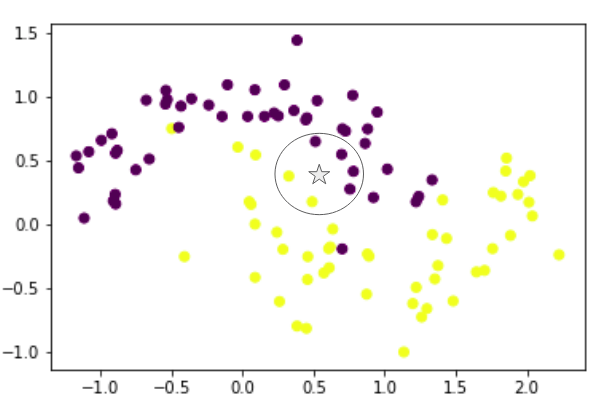

The points are arranged in a 2 dimensional space and belong to two different categories represented by the colours of the points. The star point denotes an unlabelled point and we find the closest points to this unlabelled point. As we can see that the majority of close points belong to the purple class, hence this point will be labelled as purple by kNN.

The following algorithm summarizes the steps involved in using kNN for classification.
~~~
For every unlabelled point:
    1. Compute its distance from all the labelled points (training set)
    2. Sort the distances and select k points closest to the unlabelled point.
    3. Label the given point by the label of the majority of the nearest neighors 
~~~

In [1]:
#Importing all the necessary packages. Don't import any additional packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import random

## Dataset Description

For this assignment we will be working with the hand written digits dataset, which consists of images of different digits along with the label giving the number represented by the image. Images are grayscale (black and white) and are of extreme low resolution (8x8)

Grayscale images are represented as 2d arrays (a matrix) in memory with each element representing the intensity or whiteness of that pixel. The values of each pixel range from 0 (completely black) to 255 (completely white).

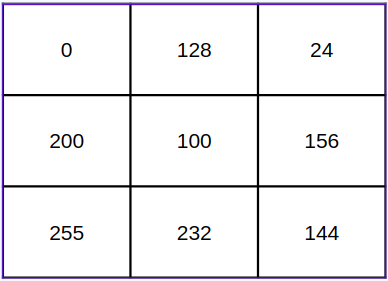

In [2]:
#Loading the dataset
digits = datasets.load_digits()

In [3]:
images = np.array(list(digits.images)) #np.array() converts the list into a numpy array
labels = np.array(list(digits.target))

In [4]:
#Lets see the how the data looks like
print(images.shape)
print(labels.shape)

(1797, 8, 8)
(1797,)


shape function of numpy gives us the dimensionality of a numpy array. For eg: A 1d numpy array of size 10 will have a shape of (10,), a matrix with 3 rows and 4 columns will have a shape (3,4). Here images array is of shape (1797, 8, 8) which means it consists of 1797 matrices representing each image of size 8x8. Labels is a vector of size 1797 representing the digit in each image. Lets see how the images look!

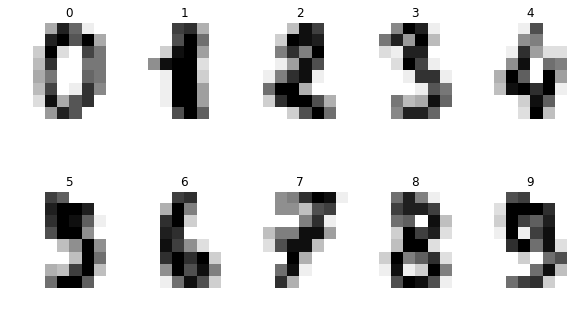

In [5]:
fig = plt.figure(figsize=(10,15))
for i in range(1,11):
    plt.subplot(5,5,i)
    plt.axis('off')
    plt.imshow(images[i-1],cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(labels[i-1])

## Task 1: Flattening Images (0.25 marks)

kNN algorithm accepts inputs as vectors for classification and not matrices. Hence if we want to use kNN for image classification we will need to flatten the images into vectors. Implement the following function (flatten()) which takes as input a 3d array which can be interpreted as a list of images and flattens each image into a vector. For instance an image with width m and height n will be represented as a matrix of shape mxn and by flattening the image we mean reshaping into a 1d array of size m*n. The figure below illustrates this:

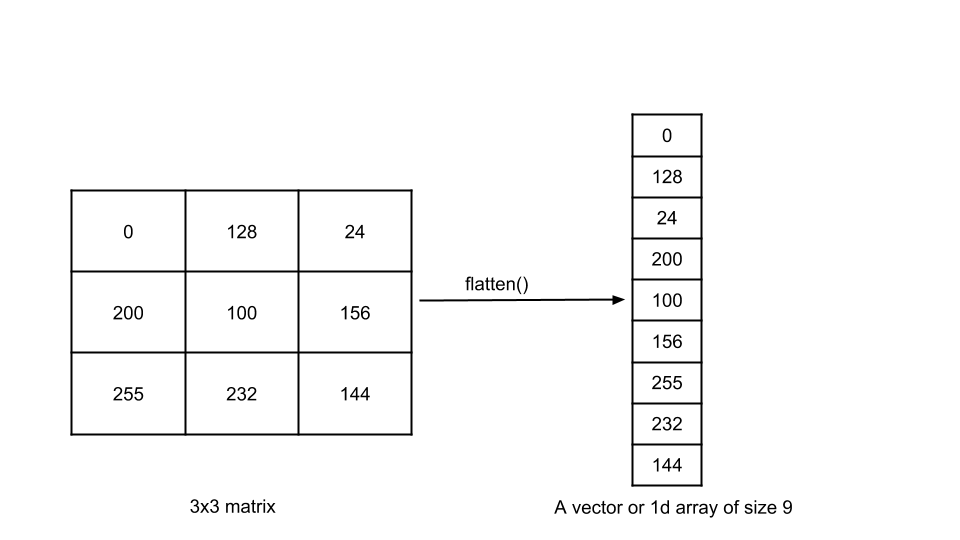

In [6]:
def flatten(images):
    '''
    This function takes different images which are 2d arrays each and returns a flattened vector for each image.
    For eg: If an image has m rows and n columns the resulting flattened image will be a vector of size m*n.
    
    Inputs:
        -images: A 3d array of dimensions [N_images, width, height]
        
    Output:
        A 2d array of size [N_images, width*height]
        
    '''
    flat_images = np.zeros((len(images), images.shape[1]*images.shape[2]))
    # YOUR CODE HERE
    for i in range(len(images)):
        flat_images[i]=images[i].flatten()
    return flat_images

In [7]:
                            """Don't change code in this cell"""
#SAMPLE TEST CASE
print("Running Sample Test Case")
np.random.seed(seed=0)
img = np.random.randn(4, 4, 3)
img_flat = flatten(img)
answer = np.array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433,  1.49407907,
        -0.20515826,  0.3130677 , -0.85409574, -2.55298982,  0.6536186 ,
         0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385,  1.53277921,
         1.46935877,  0.15494743,  0.37816252, -0.88778575, -1.98079647,
        -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682, -0.30230275, -1.04855297,
        -1.42001794, -1.70627019,  1.9507754 , -0.50965218, -0.4380743 ,
        -1.25279536,  0.77749036]])
assert np.allclose(img_flat, answer, rtol=1e-05, atol=1e-06)
print("Sample Test Case Passed")

Running Sample Test Case
Sample Test Case Passed


In [8]:
                            """Don't change code in this cell"""

#Hidden Test cases


"Don't change code in this cell"

Now that we have our flatten function working we can use it to flatten images in our dataset

In [9]:
X = flatten(images)
y = np.array(labels)

In [10]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


As you can see, X has a shape (1797,64) which means it contains 1797 flattened images. Next we split our dataset into training and testing sets. This is important because we want to learn a model which can generalize well, by keeping a test set we build our model from the data in training set only and test its performance on the test set so that we can see how well it performs on the examples it hasn't seen during training.

We use sklearn's train_test_split function which takes as the input the data and label arrays and splits it into training and test set based on the test_size supplied by the user. For eg: a test_size of 0.2 would mean keeping 80% of data for training and remaining 20% for testing. As a fun excercise look up what random_state argument is for.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 8, 8)
(360, 8, 8)
(1437,)
(360,)


## Task 2: Euclidean Distance (1.5 marks)

As we discussed earlier kNN classifies data points by finding distance of that point with all the points in the dataset and then selecting k closest points. There are different ways to define distance between 2 points. The simplest one is just the euclidean distance which we have been studying in coordinate geometry from high school. Euclidean distance which is also called L2 distance between 2 points is given by:

\begin{align}
d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + ... + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}
\end{align}
\begin{align}
where\; p \in \Re^n \; and\; q \in \Re^n
\end{align}

Your task is to implement functions to find euclidean distance between a set of points. You need to implement the following 3 functions:
* find_euclidean_distance_2vecs (0.5 marks): This function finds distance between 2 vectors or numpy arrays.
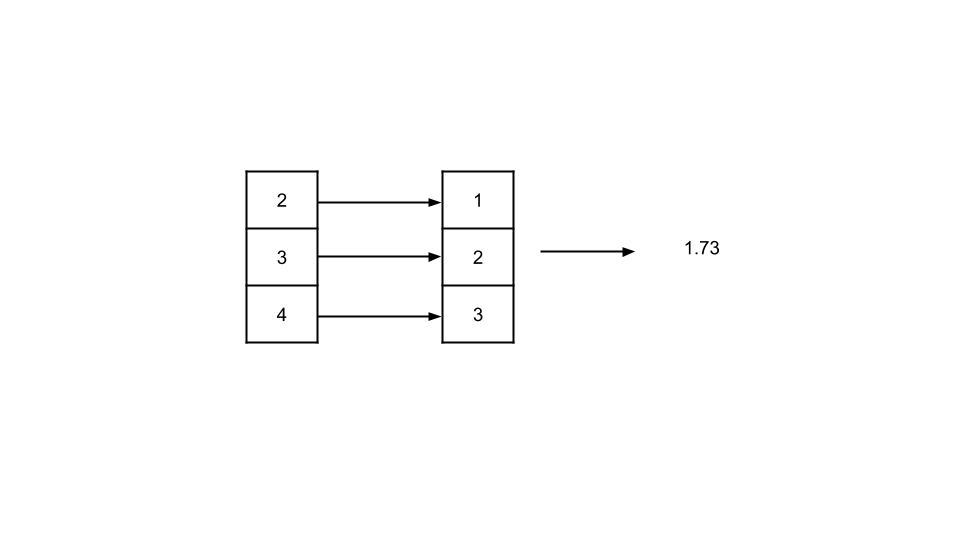
* find_euclidean_distance_1mat1vec (0.5 marks) : This function takes as input a matrix and a vector and computes the euclidean distance between the input vector and all the row vectors of the matrix.
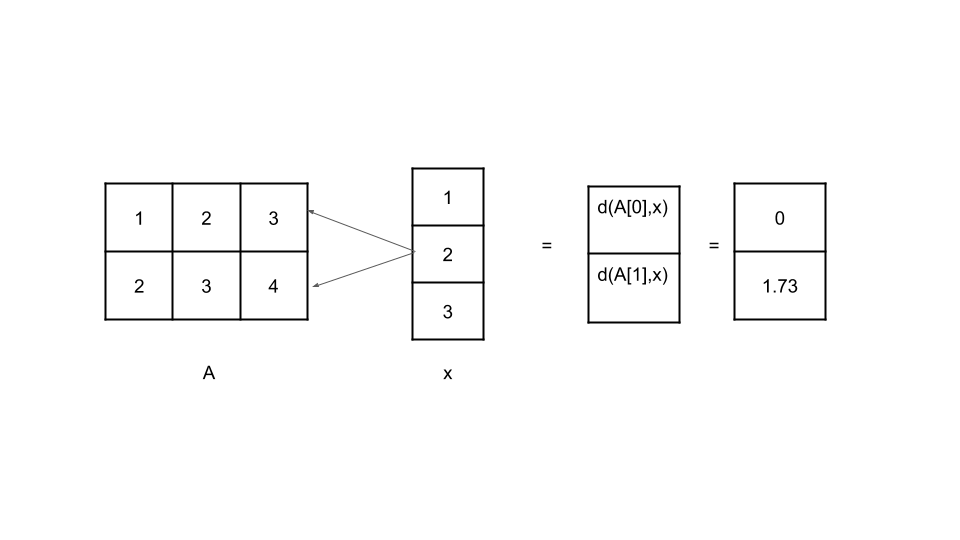
* find_euclidean_distance (0.5 marks): This function takes 2 matrices X1 and X2 as input and calculates euclidean distance between each row vector of X2 and every row vector of X1
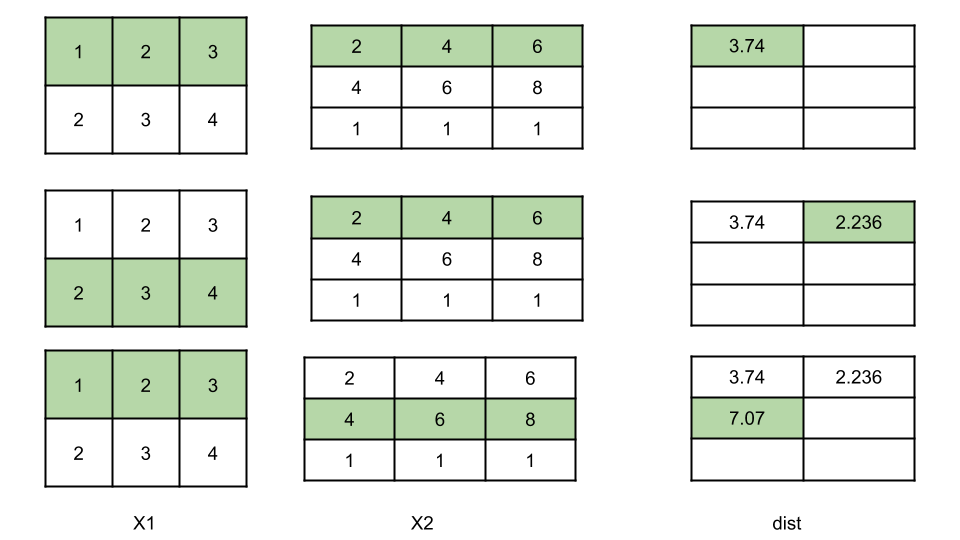

In [13]:
def find_euclidean_distance_2vecs(x1, x2):
    '''
    This function takes as the input 2 vectors x1 and x2 and computes the euclidean distance between them.
    
    Inputs:
        - x1: Vector of size n
        - x2: Vector of size n
        
    Output:
        A scalar value dist which gives the euclidean distance between x1 and x2
    '''
    dist = 0
    
    # YOUR CODE HERE
    dist=np.linalg.norm(x1-x2)
    
    return dist

In [14]:
                            """Don't change code in this cell"""
    
#SAMPLE TEST CASE
x1 = 5*np.ones(100)
x2 = np.ones(100)
dist = find_euclidean_distance_2vecs(x1, x2)
assert np.allclose(dist, 40)
print("Sample Test Case Passed")

Sample Test Case Passed


In [15]:
                            """Don't change code in this cell"""

#Hidden Test cases



"Don't change code in this cell"

In [16]:
def find_euclidean_distance_1mat1vec(X, x):
    '''
    This function takes as input a matrix containing m vectors in its each row and a vector of size n 
    and computest distance between the vector with each vector in the matrix
    
    Inputs:
        -X : A matrix of shape [m,n] consisting of m different vectors of size n each
        -x : A vector of size n
        
    Output:
        Returns a vector size m containing distance of each vector in X with x
    
    '''
    dist = np.zeros(len(X))
    
    # YOUR CODE HERE
    for i in range(len(X)):
        dist[i]=find_euclidean_distance_2vecs(X[i], x)
    return dist

In [17]:
                            """Don't change code in this cell"""
    
#SAMPLE TEST CASE
np.random.seed(seed=0)
X = np.random.rand(100, 10)
x = np.random.randn(10)
dist = find_euclidean_distance_1mat1vec(X, x)
assert np.allclose(dist, np.array([3.61993704, 3.74300092, 3.5780503 , 3.77304566, 3.15550909,
       3.04969925, 3.20554248, 3.14101802, 3.9892972 , 3.46542551,
       3.80350355, 3.94332824, 3.14969433, 3.71094698, 4.12630891,
       3.54536972, 3.4761204 , 3.3887696 , 3.54392481, 3.54974785,
       3.72675703, 3.61085286, 4.09542787, 3.23580495, 3.48064651,
       3.68127886, 3.70240091, 4.34592799, 3.67327594, 3.65551991,
       3.22545097, 3.89821567, 3.51569791, 3.67560665, 3.80514469,
       3.76362561, 3.95356816, 3.61985179, 3.72353298, 3.27386515,
       3.65917449, 3.36430289, 3.89037317, 3.64265725, 3.88827983,
       4.10702308, 3.37506945, 4.07050216, 3.68150883, 3.24305577,
       3.6154912 , 3.66288472, 3.56357994, 3.66833659, 3.6090341 ,
       3.77671459, 3.99900842, 3.99835905, 3.52630576, 3.86865475,
       3.1517229 , 3.55413617, 3.67345075, 3.68134214, 3.3940501 ,
       3.94309123, 3.84665739, 3.47115946, 3.66711688, 3.63246395,
       3.55316062, 3.39076824, 4.09419885, 3.15090814, 4.03823925,
       3.11064034, 4.27549316, 3.97360952, 2.90223318, 3.52995313,
       4.08736776, 3.53152915, 3.26832625, 3.81057364, 3.83732847,
       3.79163735, 3.82659969, 3.7096343 , 3.95152121, 3.66220283,
       3.38002861, 3.37393038, 3.7076162 , 3.70816966, 3.96150871,
       3.92666356, 3.77850047, 3.54925487, 4.03731374, 3.72034314]))
print("Sample Test Case Passed")

Sample Test Case Passed


In [18]:
                            """Don't change code in this cell"""

#Hidden Test cases


"Don't change code in this cell"

In [19]:
def find_euclidean_distance(X1, X2):
    '''
        Find L2 distance of each row vector in X2 with each row vector in X1
        
        Inputs:
            -X1 : A matrix containing m1 n dimensional vectors. [m1, n]
            -X2 : A matrix containing m2 n dimensional vectors. [m2, n]
            
        Returns a matrix of shape [m2,m1] containing distance between each point of X2 with each point of X1. For
        instance the first row of the output will contain distance of the first vector in X2 with all m1 vectors
        in X1.
    '''
    
    dist = np.zeros((X2.shape[0],X1.shape[0]))
    # YOUR CODE HERE
    for i in range(len(X2)):
        dist[i]=find_euclidean_distance_1mat1vec(X1, X2[i])
    
    return dist

In [20]:
                            """Don't change code in this cell"""
    
#SAMPLE TEST CASE
np.random.seed(0)
mat1 = np.random.rand(10, 10)
mat2 = np.random.randn(15,10)
dist = find_euclidean_distance(mat1, mat2)
assert np.allclose(dist, np.array([[4.0379296 , 4.59771037, 4.32554678, 3.92890263, 3.27873323,
        3.78293236, 3.73966935, 4.15498374, 3.7821675 , 4.11261773],
       [1.78777727, 2.01442605, 1.77020813, 1.86294336, 2.2798916 ,
        2.48116169, 2.58923148, 2.5980594 , 2.26248041, 2.29812949],
       [4.41527866, 4.17824628, 4.25473321, 4.23721846, 4.49460737,
        4.65245372, 4.3806675 , 4.72517878, 4.11818057, 4.32916503],
       [2.83785003, 2.60820671, 2.47473701, 2.66712406, 3.20343714,
        3.15666667, 3.19545649, 2.98801268, 2.49201692, 2.57107121],
       [2.77004731, 2.27278299, 2.59837055, 2.82566063, 3.18672449,
        3.01523569, 2.98095811, 3.10183306, 2.96569031, 3.02988352],
       [2.91880954, 3.31976947, 3.05805007, 2.69365652, 2.69118547,
        2.75085432, 2.31921714, 3.17472854, 2.83059829, 2.20539243],
       [4.01868874, 4.31927589, 4.10494305, 4.2389984 , 3.55512011,
        4.17403503, 4.17457832, 3.9532485 , 3.9587157 , 4.0703309 ],
       [4.06868542, 4.22233792, 4.0365841 , 3.84790938, 3.48244058,
        3.42703466, 3.51751492, 3.65984466, 3.56153077, 3.29593408],
       [3.70371614, 3.72752232, 3.73929239, 3.38461903, 3.41586259,
        3.51883139, 3.50167002, 3.78655642, 3.66252728, 3.35388491],
       [3.17895993, 3.07395127, 2.90686991, 3.08361883, 2.48310724,
        2.53958448, 2.79937924, 2.75426838, 3.13226511, 2.99426828],
       [5.17906832, 4.91043363, 5.22002696, 5.1127987 , 4.49571066,
        4.66548153, 4.70055281, 4.85082323, 4.57220331, 4.98533299],
       [3.17504739, 3.48409084, 3.77713412, 2.96732727, 3.27097232,
        3.28494124, 2.92341385, 3.89358282, 3.09209175, 3.27898194],
       [3.27862969, 3.02917857, 3.44456369, 3.24347364, 2.7855507 ,
        2.56952732, 2.60115006, 2.44141912, 2.76713469, 2.61900478],
       [2.58098414, 2.5604008 , 2.77529182, 2.54890316, 2.9025015 ,
        2.43163393, 2.39148837, 2.87833159, 3.01911092, 2.59144496],
       [3.47374015, 3.34341142, 3.35713206, 3.14865684, 3.21252288,
        3.14306535, 2.92686023, 3.55540043, 3.14617731, 2.95769716]]))
print("Sample Test Case Passed")

Sample Test Case Passed


In [21]:
                            """Don't change code in this cell"""
    
#HIDDEN TEST CASE


"Don't change code in this cell"

## Task 3: Manhattan Distance (0.5 marks)

Yet another distance measure used commonly in machine learning is the manhattan distance or L1 distance. It is very similar to euclidean distance, the only difference being that instead of doing a square of the difference in the coordinates we take absolute value instead. Formally it is given as:

\begin{align}
d(p,q) = {|p_1 - q_1| + |p_2 - q_2| + ... + |p_n - q_n|} = {\sum_{i=1}^{n}|p_i - q_i|}
\end{align}
\begin{align}
where\; p \in \Re^n \; and\; q \in \Re^n
\end{align}

Implement the function find_manhattan_distance() below which takes as input two matrices X1 and X2 and calculates manhattan distance between each row vector of X2 and every row vector of X1, similar to what we did for find_euclidean_distance()

In [22]:
def find_manhattan_distance(X1, X2):
    '''
        Find L1 distance of each row vector in X2 with each vector in X1

        Inputs:
            -X1 : A matrix containing m1 n dimensional vectors. [m1, n]
            -X2 : A matrix containing m2 n dimensional vectors. [m2, n]

        Returns a matrix of shape [m2,m1] containing distance between each vector in X2 with each vector in X1
    '''
    dist = np.zeros((X2.shape[0],X1.shape[0]))
    
    # YOUR CODE HERE
    for i in range(len(X2)):
        for j in range(len(X1)):
            dist_temp=0
            for a,b in zip(X2[i],X1[j]):
                dist_temp+=abs(a-b)
            dist[i][j]=dist_temp
        
    return dist

In [23]:
                            """Don't change code in this cell"""
    
#SAMPLE TEST CASE
dist = find_manhattan_distance(mat1, mat2)
assert np.allclose(dist, np.array([[10.95073651, 12.32345971, 11.58474874, 10.16887887,  9.21779705,
        10.67850379, 10.3003617 , 11.33037328,  9.8533292 , 10.9568622 ],
       [ 4.58994106,  5.28627479,  3.94080381,  5.06573777,  5.38382495,
         6.7768133 ,  6.97454539,  6.71446309,  5.79007459,  5.64500933],
       [13.13633934, 11.72026057, 12.28342242, 12.55407677, 13.52329503,
        14.15003124, 13.43352724, 13.70438537, 12.03317969, 12.79557846],
       [ 7.63178843,  7.05202416,  6.50023418,  6.54259082,  8.33030146,
         8.06844702,  8.12035704,  8.3033045 ,  6.27417211,  6.81928861],
       [ 7.13237717,  5.75698676,  6.45299611,  7.20738699,  8.16700182,
         7.9138932 ,  7.86835899,  8.30271935,  7.44821138,  7.32820091],
       [ 7.65809291,  8.94683953,  7.90335747,  6.83333708,  6.18119215,
         6.47942691,  6.11581147,  7.98737231,  6.78337802,  5.89478621],
       [ 9.80043126, 10.876979  ,  9.78190038, 10.56598911,  9.5170345 ,
        11.29225312, 11.19333084, 10.2712318 , 10.23185024, 10.21641485],
       [11.7586743 , 12.28177165, 11.82405428, 10.68830278, 10.52198468,
         9.80968445,  9.5251305 , 11.02668838, 10.47483052,  9.14567584],
       [ 9.07794979, 10.32428878,  9.73300501,  8.74616797,  8.49874808,
         8.97559451,  8.7515476 , 10.28797607, 10.57910123,  9.52407903],
       [ 8.31955837,  8.33647338,  7.51483247,  8.63455162,  6.21153268,
         6.66670322,  7.28679648,  6.74612315,  8.90508518,  8.26224637],
       [14.70152192, 13.74938896, 14.89469234, 14.3112285 , 12.09041636,
        13.33798652, 13.0539928 , 13.29317346, 11.60954441, 13.38092149],
       [ 8.1170259 ,  8.37064259,  9.78229305,  7.83068513,  8.84986376,
         8.45757735,  7.81868302,  9.96380784,  7.17493611,  8.31069763],
       [ 8.21621485,  8.08589969,  8.53363306,  8.66880355,  6.31542744,
         6.68910343,  6.70026755,  5.38071856,  7.07241737,  6.7951772 ],
       [ 7.06682203,  6.33721944,  7.15513866,  7.36512741,  6.80520355,
         5.83222724,  6.29224001,  6.29529478,  8.23719458,  7.04607101],
       [ 9.36578935,  8.95413646,  9.03694638,  8.7625235 ,  8.16739709,
         8.05353935,  7.64618571,  8.10328396,  7.92789556,  7.37923134]]))
print("Sample Test Case Passed")

Sample Test Case Passed


In [24]:
                            """Don't change code in this cell"""
    
#HIDDEN TEST CASE


"Don't change code in this cell"

## Task 4 : Cosine Similarity (0.5 marks)

Another distance measure that we can use for our kNN based classifier is Cosine Similarity. Strictly speaking cosine similarity does not exactly captures the distance between 2 vectors but represents the angle (cosine of the angle) between 2 vectors. If 2 vectors align perfectly in same direction then they will have a cosine similarity of one(cos(0) = 1), if they are perpendicular to each other then the cosine similarity between them will be 0 (cos(90) = 0) and finally anti parallel vectors will have a cosine similarity of -1 (cos(180) = -1).

We can compute cosine similarity between 2 vectors by taking dot product between them and dividing it by the length of two vectors.

\begin{align}
p.q &= ||p||\;||q||\;cos(\theta)\\
cos(\theta) &= (p.q)/(||p||\;||q||)\\
            &=\frac{\sum_{i = 1}^{n}p_iq_i}{\sqrt{\sum_{i = 1}^{n}p_i^2}\sqrt{\sum_{i = 1}^{n}q_i^2}}
\end{align}
\begin{align}
where\; p \in \Re^n \; and\; q \in \Re^n
\end{align}

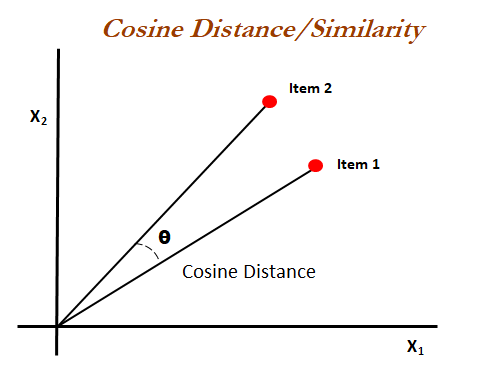

Implement the function find_cosine_similarity() below which takes as input two matrices X1 and X2 and calculates the **negative** of cosine similarity between each row vector of X2 and every row vector of X1, similar to what we did for find_euclidean_distance() and find_manhattan_distance(). We are taking negative of cosine similarity to give it a sort of distance like interpretation.

In [25]:
def find_cosine_similarity(X1, X2):
    '''
        Find negative of cosine similarity between each vector in X2 with each vector in X1
        
        Inputs:
            -X1 : A matrix containing m1 n dimensional vector. [m1, n]
            -X2 : A matrix containing m2 n dimensional vector. [m2, n]
            
        Returns a matrix of shape [m2,m1] containing negative of cosine similarity between each vector of X2
        with each vector of X1
    '''
    
    cosine_sim = np.zeros((X2.shape[0],X1.shape[0]))
    
    # YOUR CODE HERE
    for i in range(len(X2)):
        for j in range(len(X1)):
            cosine_sim[i][j]=-np.dot(X2[i],X1[j])/np.linalg.norm(X2[i])/np.linalg.norm(X1[j])
        
    
    return cosine_sim

In [26]:
                            """Don't change code in this cell"""
    
#SAMPLE TEST CASE
np.random.seed(0)
mat1 = np.random.rand(10, 10)
mat2 = np.random.randn(15,10)
dist = find_cosine_similarity(mat1, mat2)
assert np.allclose(dist, -1*np.array([[ 0.1344698 , -0.17870739, -0.01782267,  0.17187483,  0.51410334,
         0.19631915,  0.21319015,  0.01538615,  0.20907282, -0.04012829],
       [ 0.72347283,  0.64166404,  0.72993634,  0.69327542,  0.47299102,
         0.35906064,  0.27046601,  0.3378867 ,  0.49719508,  0.46691197],
       [ 0.23986783,  0.35307201,  0.31817602,  0.3183252 ,  0.11846585,
         0.02848302,  0.20085397,  0.03756443,  0.37245885,  0.23973424],
       [ 0.55278208,  0.64312548,  0.69158041,  0.62303453,  0.34320331,
         0.37864216,  0.34953349,  0.47990624,  0.72401686,  0.70748387],
       [ 0.38339269,  0.60275028,  0.46598993,  0.33624175, -0.02852617,
         0.13703846,  0.13633408,  0.15260681,  0.19295336,  0.11621969],
       [-0.05694286, -0.36355035, -0.15065401,  0.04805285, -0.23494178,
        -0.21365574,  0.10670036, -0.40841656, -0.22696572,  0.21829139],
       [ 0.09573713, -0.07067253,  0.05281597, -0.05895197,  0.27050243,
        -0.14569253, -0.18306239,  0.07988979,  0.03360512, -0.08191017],
       [-0.32350182, -0.42744895, -0.29361181, -0.22584818, -0.18827656,
        -0.0926771 , -0.20773276, -0.15049181, -0.15672579, -0.00746205],
       [ 0.17102598,  0.15963634,  0.15573316,  0.31786482,  0.2372888 ,
         0.1842945 ,  0.18005303,  0.07163458,  0.1073723 ,  0.28750081],
       [-0.11068639, -0.03563878,  0.07878739, -0.09859815,  0.1273056 ,
         0.12651894, -0.12654209,  0.07750899, -0.30652987, -0.26585987],
       [-0.53064098, -0.35300933, -0.54937236, -0.54464111, -0.34699483,
        -0.42436409, -0.50912482, -0.42441913, -0.30795961, -0.71732484],
       [ 0.38322762,  0.23267732,  0.07922112,  0.47057467,  0.25955073,
         0.26445936,  0.48673601, -0.06415711,  0.38960104,  0.26354484],
       [-0.11837837,  0.04905929, -0.22659909, -0.14846987, -0.04105809,
         0.17145772,  0.11615088,  0.3281263 ,  0.06038426,  0.1225575 ],
       [ 0.48004079,  0.48982287,  0.39259293,  0.48265246,  0.20520952,
         0.51789724,  0.54140236,  0.29609438,  0.17221925,  0.42287729],
       [-0.42276353, -0.3144395 , -0.31831344, -0.23335   , -0.67382286,
        -0.49910576, -0.36099591, -0.67331454, -0.43236882, -0.34889529]]))
print("Sample Test Case Passed")

Sample Test Case Passed


In [27]:
                            """Don't change code in this cell"""
    
#HIDDEN TEST CASE

"Don't change code in this cell"

## Task 5 : Full kNN for classification (2 marks)

Now that we have our distance functions ready we can use them to implement the full kNN algorithm. You need to implement the predict function which takes as input the training images and labels, testing images, distance_func i.e. whether to use find_euclidean_distance, find_manhattan_distance or find_cosine_similarity as a distance measure and finally k which is the number of nearest neighors to consider for making the prediction. Follow the following steps to implement the function

~~~
1. Flatten both X_train and X_test using the flatten function implemented above
2. Compute distance from each image (flattened) in X_test to every image (flattened) in X_train using the distance_func argument which can be find_euclidean_distance, find_manhattan_distance or find_cosine_similarity
3. Once you have the distance matrix find k closest neighors to each image in the X_test
4. Take the majority class of the k nearest neighors of the image as the prediction
~~~

Hint: You might find np.argsort or np.sort useful for finding the nearest neighors.

Note: We can pass functions as arguments to other functions in python. For eg:
~~~
def print_hello(name):
    print("Hello!" + name)

def print_hi(name):
    print("Hi!" + name)

def print_something(name, print_fn):
    print_fn(name)
    
print_something("Kabir", print_hello) //prints Hello! Kabir
print_something("Kabir", print_hi) //prints Hi! Kabir
~~~


In [44]:
def predict(X_train, y_train, X_test, distance_func = find_euclidean_distance, k = 10):
    '''
    Takes as the input training data and using that makes predictions on test data
    
    Inputs:
        -X_train : Images in the training set. Shape [N_train, width, height]
        -y_train : Category to which each image in the training set belongs (0,1,2, ... ,9)
        -X_test : Images in the test set. Shape [N_test, width, height] 
        -distance_func : Function to use to compute distance between the points. (find_euclidean_distance,
        find_manhattan_distance, find_cosine_similarity)
        -k : Number of nearest neighors to consider to make predictions
    '''
    y_preds = np.zeros(len(X_test))
    # YOUR CODE HERE
    X_train=flatten(X_train)
    X_test=flatten(X_test)
    distance=distance_func(X_train,X_test)
    for i in range(len(distance)):
        arr=[[i, j]  for i ,j in zip(distance[i],y_train)]
        arr.sort(key=lambda arr1:arr1[0])
        arr=[i[1] for i in arr ]
        arr=arr[:k]
        arr.sort()
        y_preds[i]=max(arr,key=arr.count)
        
    return y_preds

In [45]:
                            """Don't change code in this cell"""
    
#SAMPLE TEST CASE
y_preds = predict(X_train[:10],y_train[:10], X_test[:2],k = 5)
assert np.allclose(y_preds,[8,8])
print("Sample Test Case Passed")

Sample Test Case Passed


In [46]:
                            """Don't change code in this cell"""
    
#HIDDEN TEST CASE



"Don't change code in this cell"

## Task 6 : Find Accuracy (0.25 marks)

Your final task for this assignment is to compute the accuracy of our classifier. Implement the find_accuracy function which takes as the input the predictions of our classifier and the actual labels and computes the accuracy. We define accuracy as the ratio between number of correctly classified examples and total number of examples. For eg. if a classifier classifies 20 out of 100 examples correctly then the accuracy will be 20%.

In [47]:
def find_accuracy(y_preds, y_true):
    '''
    Calculates the accuracy of the classifier.
    
    Inputs:
        -y_preds : Predictions by KNN Classifier
        -y_true : Actual labels
        
    Output:
        Accuracy in percentage which is defined as : 100*number_of_correctly_classified_examples/total_examples
    '''
    
    acc = 0
    # YOUR CODE HERE
    count=0
    for i,j in zip(y_preds,y_true):
        if i==j:
            count+=1
    #count-=1
    acc=count/len(y_true)*100
    
    return acc

We will now evaluate our model on the test set using different distance functions. You should expect 97.2% accuracy when we use find_euclidean_distance, 96.67% accuracy when we use find_manhattan_distance and 96.67% accuracy when we use find_cosine_similarity

In [48]:
y_preds_euc = predict(X_train, y_train, X_test,find_euclidean_distance)
acc_euc = find_accuracy(y_preds_euc, y_test)
print(acc_euc)

97.22222222222221


In [49]:
y_preds_man = predict(X_train, y_train, X_test,find_manhattan_distance)
acc_man = find_accuracy(y_preds_man, y_test)
print(acc_man)

96.66666666666667


In [50]:
y_preds_cos = predict(X_train, y_train, X_test,find_cosine_similarity)
acc_cos = find_accuracy(y_preds_cos, y_test)
print(acc_cos)

96.66666666666667


In [35]:
                            """Don't change code in this cell"""
    
#HIDDEN TEST CASE


"Don't change code in this cell"

## Conclusion:

In this assignment we saw how to use kNN algorithm for image classification. kNN though is a terrible algorithm for image classification which must have been evident from the low values of accuracies. Consider an image of 0 digit and lets say we rotate the image by 45 degrees. Although the image will still represent the same digit but the pixel distribution will change completely. This will cause the distance to be high between the 2 images even when they belong to the same category. In your subsequent lectures and assignments you will study different algorithms which are more suitable for this problem.